In [1]:
import os
os.getcwd()

'/Users/long/Projects/Python/release-models/cloudy/python'

In [2]:
from astropy.io import ascii
from astropy.table import Table, join,vstack,hstack
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xfiles=glob('xx*master.txt')
# xfiles
xroots=[]
for one in xfiles:
    xroots.append(one.replace('.master.txt',''))

xroots=np.sort(xroots)


In [4]:
def get_roots(prefix='xx'):
    xfiles=glob('%s*master.txt' % prefix)
    xorder=[]
    xroot=[]
    for one in xfiles:
        foo=one.replace('.master.txt','')
        xroot.append(foo)
        foo=foo.replace('%s_' % prefix,'')
        foo=foo.replace('p','+')
        foo=foo.replace('m','-')
        xorder.append(eval(foo))
    xtab=Table([xroot,xorder],names=['Root','IP'])
    xtab['IP'].format='.2f'
    xtab.sort('IP')
    return xtab
    

         
    
root_tab=get_roots()        

In [5]:
root_tab

Root,IP
str8,float64
xx_m8.00,-8.00
xx_m5.00,-5.00
xx_m4.87,-4.87
xx_m4.74,-4.74
xx_m4.61,-4.61
xx_m4.47,-4.47
...,...
xx_p7.21,7.21
xx_p7.34,7.34


In [6]:
def get_frac(root,element='H'):
    filename='%s.%s.frac.txt' % (root,element)
    try:
        xtab=ascii.read(filename)
        
    except:
        print('Error: could not read %s',filename)
        return None

    colnames=xtab.colnames
    # print(colnames)
    # i=3
    # while i<len(colnames):
    #    xtab.rename_column(colnames[i],colnames[i].replace('i',element))
    #    i+=1
    xtab.remove_column('r')
    xtab.remove_column('inwind')
    return xtab

get_frac('xx_p0.25','H')

    

    

i,i01,i02
int64,float64,float64
0,0.0,0.0
1,5.15e-05,1.0
2,0.0,0.0
3,0.0,0.0


In [7]:
def make_summary_table(roots, element='H'):

    record=[]
    for one in roots:
        xtab=ascii.read(one+'.master.txt')
        ytab=xtab['i','converge','t_e','t_r','ip','xi']
        ztab=ytab[ytab['i']==1]
        # print(ztab)
        htab=get_frac(one,element)
        zztab=join(ztab,htab,join_type='left')
        # hetab=get_frac(one,'He')
        # zztab=join(zztab,hetab,join_type='left')
        # # print(zztab)
        record.append(zztab)

    xxx=vstack(record)

    

    xxx['ip'].format='.3e'
    xxx['xi'].format='.3e'
    xxx['t_e'].format='.3e'
    xxx['t_r'].format='.3e'
    

    xxx.write('py_%s_pl.txt' % element,format='ascii.fixed_width_two_line',overwrite=True)
    return xxx



make_summary_table(root_tab['Root'])
        

i,converge,t_e,t_r,ip,xi,i01,i02
int64,int64,float64,float64,float64,float64,float64,float64
1,0,5.420e+03,7.100e+07,4.730e-10,3.480e-08,0.994,0.00563
1,0,8.150e+03,7.100e+07,4.730e-07,3.480e-05,0.815,0.185
1,0,8.290e+03,7.100e+07,6.400e-07,4.710e-05,0.787,0.213
1,0,8.440e+03,7.100e+07,8.660e-07,6.380e-05,0.756,0.244
1,0,8.590e+03,7.100e+07,1.170e-06,8.630e-05,0.721,0.279
1,0,8.740e+03,7.100e+07,1.590e-06,1.170e-04,0.683,0.317
...,...,...,...,...,...,...,...
1,2,1.060e+07,7.100e+07,7.710e+05,5.680e+07,1.36e-14,1.0
1,2,1.060e+07,7.100e+07,1.040e+06,7.680e+07,1.01e-14,1.0


In [8]:
x=make_summary_table(root_tab['Root'],'He')
x=make_summary_table(root_tab['Root'],'C')
x=make_summary_table(root_tab['Root'],'N')
x=make_summary_table(root_tab['Root'],'O')
x=make_summary_table(root_tab['Root'],'Fe')
# x=make_summary_table(root_tab['Root'],'C')

In [9]:
def do_all():
    root_tab=get_roots('xx')
    sum_tab=make_summary_table(root_tab['Root'])
    print(root_tab.info)
    print(sum_tab.info)
    final=hstack([root_tab,sum_tab])
    final.info()
    return final

xfinal=do_all()

<Table length=101>
name  dtype  format
---- ------- ------
Root    str8       
  IP float64    .2f

<Table length=101>
  name    dtype  format
-------- ------- ------
       i   int64       
converge   int64       
     t_e float64    .3e
     t_r float64    .3e
      ip float64    .3e
      xi float64    .3e
     i01 float64       
     i02 float64       

<Table length=101>
  name    dtype  format
-------- ------- ------
    Root    str8       
      IP float64    .2f
       i   int64       
converge   int64       
     t_e float64    .3e
     t_r float64    .3e
      ip float64    .3e
      xi float64    .3e
     i01 float64       
     i02 float64       


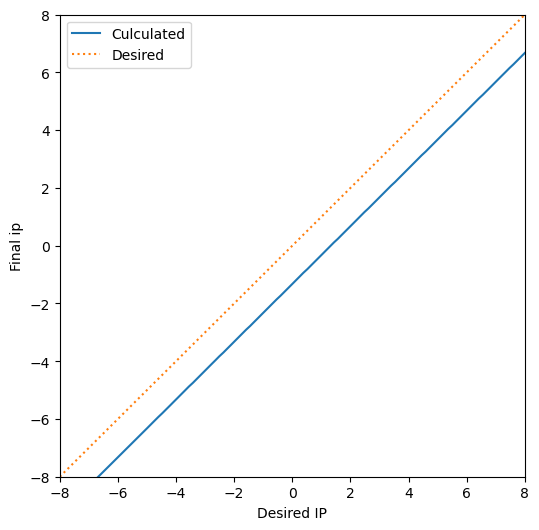

In [10]:
plt.figure(1,(6,6))
plt.plot(xfinal['IP'],np.log10(xfinal['ip']),label='Culculated')
plt.plot([-8,8],[-8,8],':',label='Desired')
plt.xlabel('Desired IP')
plt.ylabel('Final ip')
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.legend()

In [11]:
xfinal.write('toast.txt',format='ascii.fixed_width_two_line',overwrite=True)